# <u>Movie Recommendation System

 We are going to built a movie recommendation system using **Content Bases Recommendation**. We are using **movielens** dataset.

In [2]:
import numpy as np
import pandas as pd
import warnings

In [32]:
# if we get any warning we can filter using
warnings.filterwarnings('ignore')

## Get the Dataset

In [4]:
# u.data is a tsv file (tab seperated value file) so we need to pass seperator '\t'

columns_name = ['user_id','item_id','rating', 'time_stamp']
df = pd.read_csv("movielens-100k-dataset/u.data", sep = '\t', names = columns_name)

In [5]:
df.head()

,user_id,item_id,rating,time_stamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
df.shape

(100000, 4)

In [7]:
# No of unique users
df['user_id'].nunique()

943

In [8]:
# No of unique movies
df['item_id'].nunique()

1682

In [9]:
# Read  file to get the name of the movies whose seperator is |
movie_titles = pd.read_csv("movielens-100k-dataset/u.item", sep = '\|', header = None)

In [10]:
movie_titles.shape

(1682, 24)

In [11]:
movie_titles.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
movie_titles = movie_titles[[0, 1]]
movie_titles.columns = ['item_id', 'title']

In [13]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [14]:
# Merging both the dataframes
data = pd.merge(df, movie_titles, on = 'item_id')

In [15]:
data.head()

,user_id,item_id,rating,time_stamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [16]:
data.shape

(100000, 5)

## Exploratory Data Analysis

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [18]:
# Average rating of each movie
data.groupby('title').mean()['rating'].sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [19]:
# Counting total no. of rating for each movie
data.groupby('title').count()['rating'].sort_values(ascending = False)

title
Star Wars (1977)                                     583
Contact (1997)                                       509
Fargo (1996)                                         508
Return of the Jedi (1983)                            507
Liar Liar (1997)                                     485
English Patient, The (1996)                          481
Scream (1996)                                        478
Toy Story (1995)                                     452
Air Force One (1997)                                 431
Independence Day (ID4) (1996)                        429
Raiders of the Lost Ark (1981)                       420
Godfather, The (1972)                                413
Pulp Fiction (1994)                                  394
Twelve Monkeys (1995)                                392
Silence of the Lambs, The (1991)                     390
Jerry Maguire (1996)                                 384
Chasing Amy (1997)                                   379
Rock, The (1996)         

In [20]:
ratings = pd.DataFrame(data.groupby('title').mean()['rating'])

In [21]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [22]:
ratings['no. of ratings'] = pd.DataFrame(data.groupby('title').count()['rating'])

In [23]:
ratings.head()

,rating,no. of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [24]:
# We cant believe a movie to be good if it is seen by 2 or 3 person only
ratings.sort_values(by = 'rating', ascending = False).head()

,rating,no. of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


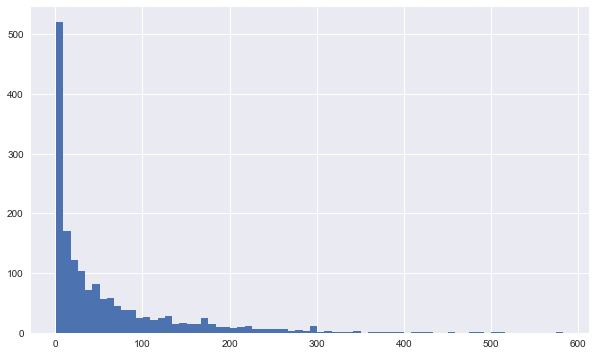

In [25]:
# plotting the histogram of the column 'no of rating'
plt.figure(figsize = (10, 6))
plt.hist(ratings['no. of ratings'], bins = 70)
plt.show()

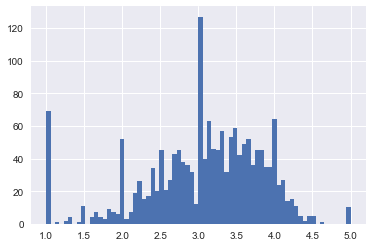

In [26]:
# plotting the histogram of the column 'ratings'
plt.hist(ratings['rating'], bins = 70)
plt.show()

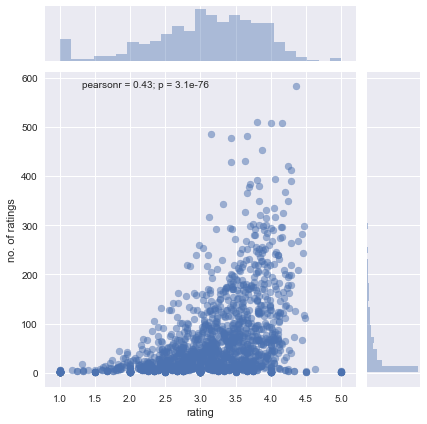

In [36]:
sns.jointplot(x = 'rating', y = 'no. of ratings', data = ratings, alpha = 0.5)
plt.show()
# shows that if the average rating is increasing the no. of ratings is also increasing

## Creating Movie Recommendation

In [38]:
data.head()

,user_id,item_id,rating,time_stamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [42]:
# Creating pivot table 
movie_matrix = data.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [43]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [47]:
ratings.sort_values('no. of ratings', ascending = False).head()

,rating,no. of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


### Recommend Movie to watch after Starwars

In [48]:
starwar_user_ratings = movie_matrix['Star Wars (1977)']

In [49]:
starwar_user_ratings

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
6      4.0
7      5.0
8      5.0
9      5.0
10     5.0
11     NaN
12     4.0
13     5.0
14     5.0
15     5.0
16     NaN
17     NaN
18     4.0
19     NaN
20     3.0
21     3.0
22     5.0
23     4.0
24     NaN
25     5.0
26     4.0
27     3.0
28     4.0
29     NaN
30     3.0
      ... 
914    NaN
915    NaN
916    5.0
917    3.0
918    NaN
919    3.0
920    NaN
921    4.0
922    5.0
923    5.0
924    5.0
925    NaN
926    NaN
927    NaN
928    NaN
929    4.0
930    2.0
931    3.0
932    NaN
933    4.0
934    5.0
935    NaN
936    4.0
937    5.0
938    5.0
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [51]:
# Finding the correlation of starwar movie with each and other movie
# To find the relation between the ratings of this movie with  other movies given by all user

similar_to_starwars = movie_matrix.corrwith(starwar_user_ratings)

In [52]:
similar_to_starwars
# If there are no person who rated starwars as well as any other movie then we will get correlation as NaN

title
'Til There Was You (1997)                                   0.872872
1-900 (1994)                                               -0.645497
101 Dalmatians (1996)                                       0.211132
12 Angry Men (1957)                                         0.184289
187 (1997)                                                  0.027398
2 Days in the Valley (1996)                                 0.066654
20,000 Leagues Under the Sea (1954)                         0.289768
2001: A Space Odyssey (1968)                                0.230884
3 Ninjas: High Noon At Mega Mountain (1998)                      NaN
39 Steps, The (1935)                                        0.106453
8 1/2 (1963)                                               -0.142977
8 Heads in a Duffel Bag (1997)                             -0.577350
8 Seconds (1994)                                           -0.755929
A Chef in Love (1996)                                       0.868599
Above the Rim (1994)        

In [54]:
Corr_starwars = pd.DataFrame(similar_to_starwars, columns = ["Correlation"])

In [56]:
Corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [60]:
# Deleting all the rows with NaN value
Corr_starwars.dropna(inplace = True)

In [61]:
Corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [63]:
# If i have liked Starwars movie then which movie will be recommended to me next?
# Ofcourse the movie with highest correlation value with starwars.


# Get the top 10 most reccomended movie after Starwars
Corr_starwars.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


** May be there are some movies which are rated by very less people and those people also rated the movie starwars so its obvious that the correalation between starwars and the other movie wil be high which we dont want...So we need to make out filter which can filter our such movies which are rated by very few people.** 

In [64]:
Corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [65]:
ratings.head()

,rating,no. of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [71]:
# To check the no. of person rated a movie alond with the starwar's correlation we must join 'ratings' and 'Corr_starwars'
corr_starwars = Corr_starwars.join(ratings['no. of ratings'])
corr_starwars.head()

,Correlation,no. of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [82]:
corr_starwars[corr_starwars['no. of ratings']>100].sort_values('Correlation', ascending = False).head(6)

,Correlation,no. of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241


In [74]:
# Hurrey these movies are same recommended by Googles recommended system
# All these movies are quite part of starwars
# Job Done! :)

### <u>Lets Create a Predict Function

In [83]:
# Predicting top 5 recommended movie
def recommend_movie(movie_name):
    movie_user_ratings = movie_matrix[movie_name]
    similar_to_movie = movie_matrix.corrwith(movie_user_ratings)
    
    Corr_movie = pd.DataFrame(similar_to_movie, columns = ["Correlation"])
    Corr_movie.dropna(inplace = True)
    
    Corr_movie = Corr_movie.join(ratings['no. of ratings'])
    recommendations = Corr_movie[Corr_movie['no. of ratings']>100].sort_values('Correlation', ascending = False).head(6)
    
    return recommendations

#### Recommendations

In [84]:
recommendations = predict_movie("Star Wars (1977)")

In [85]:
recommendations

,Correlation,no. of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241


**Our Movie Recommendation System is Predicting the movies as expected.... Function is working** 

In [86]:
recommendations = predict_movie("Empire Strikes Back, The (1980)")

In [87]:
recommendations

,Correlation,no. of ratings
title,,
"Empire Strikes Back, The (1980)",1.000000,367
Star Wars (1977),0.747981,583
Return of the Jedi (1983),0.721229,507
Raiders of the Lost Ark (1981),0.538659,420
"Philadelphia Story, The (1940)",0.482151,104
"Frighteners, The (1996)",0.442761,115


In [88]:
recommendations = predict_movie("Titanic (1997)")

In [89]:
recommendations

,Correlation,no. of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
William Shakespeare's Romeo and Juliet (1996),0.430243,106


**Check the movies....there are some similarities among the movies that are recommended**